In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv('Ecommerce_UKRetailer.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [24]:
df.shape

(541909, 8)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Cleaning Data

In [26]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [27]:
null_C_ID = df[df.CustomerID.isnull()].index
df.drop(null_C_ID,inplace = True)

In [28]:
null_Des = df[df['Description'].isnull()].index
df.drop(null_Des,inplace = True)

In [29]:
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate)
df['CustomerID'] = df.CustomerID.astype('int')
df['InvoiceNo'] = df.CustomerID.astype('int')

In [30]:
df.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000,406829.000000
mean,15287.690570,12.061303,3.460471,15287.690570
std,1713.600303,248.693370,69.315162,1713.600303
min,12346.000000,-80995.000000,0.000000,12346.000000
25%,13953.000000,2.000000,1.250000,13953.000000
50%,15152.000000,5.000000,1.950000,15152.000000
75%,16791.000000,12.000000,3.750000,16791.000000
max,18287.000000,80995.000000,38970.000000,18287.000000


## Task 1. Perform Basic EDA
#### a. Boxplot – All Numeric Variables

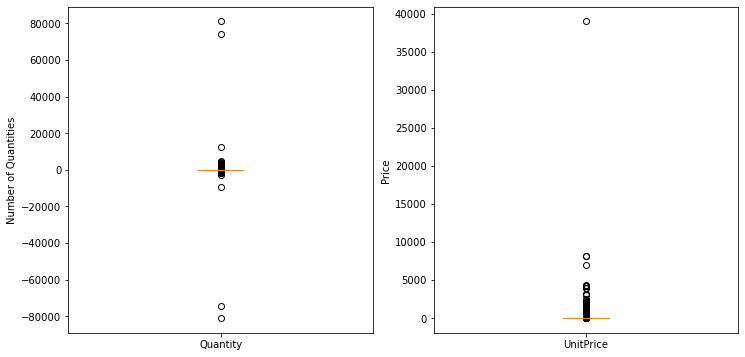

In [31]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
ax[0].boxplot(df["Quantity"])
ax[0].set_xticklabels(["Quantity"])
ax[0].set_ylabel('Number of Quantities')
ax[1].boxplot(df["UnitPrice"])
ax[1].set_xticklabels(["UnitPrice"])
ax[1].set_ylabel("Price")
plt.show()

In [32]:
# There are many outliars in the data set
# We should remove the negative values from quantitu
df.drop(df[df['Quantity']<0].index, inplace = True)

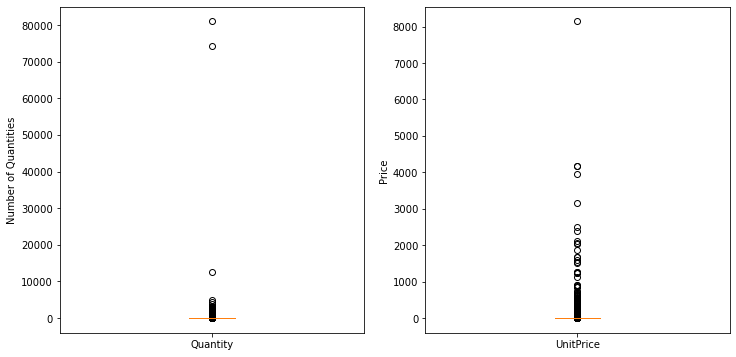

In [33]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
ax[0].boxplot(df["Quantity"])
ax[0].set_xticklabels(["Quantity"])
ax[0].set_ylabel('Number of Quantities')
ax[1].boxplot(df["UnitPrice"])
ax[1].set_xticklabels(["UnitPrice"])
ax[1].set_ylabel("Price")
plt.show()

#### b. Histogram – All Numeric Variables

In [34]:
df1 = df[df['Quantity']< 10000]
df1 = df1[df1['UnitPrice']<1000]

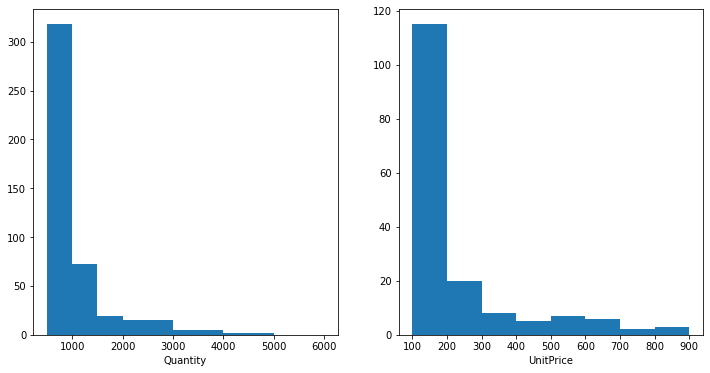

In [35]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
ax[0].hist(df1.Quantity,bins=[500,1000,1500,2000,3000,4000,5000,6000])
ax[0].set_xlabel('Quantity')
ax[1].hist(df1.UnitPrice,bins=[100,200,300,400,500,600,700,800,900])
ax[1].set_xlabel('UnitPrice')
plt.show()

#### c. Distribution Plot – All Numeric Variables

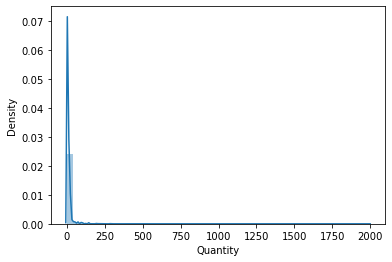

In [36]:
df2 = df1[df1['Quantity']< 2000]
sns.distplot(df2.Quantity)
plt.show()

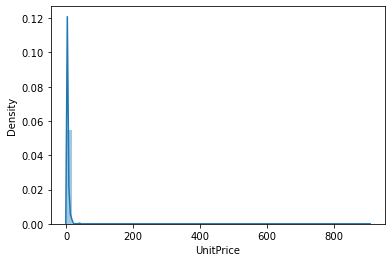

In [37]:
sns.distplot(df2["UnitPrice"])
plt.show()

### d. Aggregation for all numerical Columns

In [38]:
df2.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID
count,397878.000000,397878.000000,397878.000000,397878.000000
mean,15294.393827,12.449929,2.989127,15294.393827
std,1713.159107,37.357203,6.994429,1713.159107
min,12347.000000,1.000000,0.000000,12347.000000
25%,13969.000000,2.000000,1.250000,13969.000000
50%,15159.000000,6.000000,1.950000,15159.000000
75%,16795.000000,12.000000,3.750000,16795.000000
max,18287.000000,1992.000000,908.160000,18287.000000


### e. Unique Values across all columns

In [ ]:
a = df2.nunique()
print("Unique value across the table are : ")
print(a)

#### f. Duplicate values across all columns

In [ ]:
b = df2[df2.duplicated()]
print("Duplicate values across all columns are")
print(b)

#### g. Correlation – Heatmap - All Numeric Variables

In [ ]:
correlation = df2.corr()
sns.heatmap(correlation,annot = True,)

#### h. Regression Plot - All Numeric Variables

In [ ]:
sns.regplot(x = 'Quantity',y = 'UnitPrice',data = df2)
plt.show()

#### i. Bar Plot – Every Categorical Variable vs every Numerical Variable


In [ ]:
plt.subplots(figsize=(12,10))
df2.groupby(['Country'])['Quantity'].count().plot.barh()
plt.xlabel('Quantity')
plt.show()

In [ ]:
plt.subplots(figsize=(12,10))
df2.groupby(['Country'])['UnitPrice'].sum().plot.barh()
plt.xlabel('Total Price')
plt.show()

#### j. Pair plot - All Numeric Variables

In [ ]:
sns.pairplot(df2 , hue = 'UnitPrice' , palette = 'coolwarm')
plt.show()

#### k. Line chart to show the trend of data

In [ ]:
plt.plot(df2["InvoiceDate"],df2["Quantity"],linestyle ='solid')
plt.show()

#### l. Plot the skewness - All Numeric Variables

In [ ]:
df4=df2[df2["Quantity"]<70]
sns.distplot(df4["Quantity"],kde=False)
plt.ylabel("Frequency")
median_price = round(df4["Quantity"].median(), 2)
mean_price = round(df4["Quantity"].mean(), 2)
plt.axvline(x=median_price, linestyle='--', linewidth=1.5,c= 'g',label= 'Median')
plt.axvline(x=mean_price, linestyle='--', linewidth=1.5,c='r',label = "Mean")
plt.legend()
plt.show()

In [ ]:
df4=df2[df2["UnitPrice"]<30]
sns.distplot(df4["UnitPrice"],kde=False)
median_price = round(df4["UnitPrice"].median(), 2)
mean_price = round(df4["UnitPrice"].mean(), 2)
plt.axvline(x=median_price, linestyle='--', linewidth=1.5,c= 'g',label= 'Median')
plt.axvline(x=mean_price, linestyle='--', linewidth=1.5,c='r',label = "Mean")
plt.legend()
plt.show()

As mean is greater than median the quantities are positively skewed.

#### 2. Check for missing values in all columns and replace them with the appropriate metric (Mean/Median/Mode)

In [3]:
data = pd.read_csv('Ecommerce_UKRetailer.csv')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
mode_C = data["CustomerID"].mode()[0]
data["CustomerID"]=data["CustomerID"].fillna(mode_C)
mode_D = data['Description'].mode()[0]
data['Description'] = data.Description.fillna(mode_D)

Here, we have replaced the missing value with mode

## Task 3. Remove duplicate rows

In [6]:
data[data.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [7]:
data.drop_duplicates(inplace = True)

In [9]:
data[data.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


## Task 4. Remove rows which have negative values in Quantity column

In [10]:
ind = data[data['Quantity']<0].index
data.drop(ind,inplace = True)

## Task 5. Add the columns - Month, Day and Hour for the invoice

In [11]:
data['InvoiceDate'] = pd.to_datetime(data.InvoiceDate)
data['Year'] = data.InvoiceDate.dt.year
data['Month'] = data.InvoiceDate.dt.month
data['Day'] = data.InvoiceDate.dt.day
data['Hour'] = data.InvoiceDate.dt.hour

## 6. How many orders made by the customers?

In [ ]:
data['Quantity'].value_counts().sum()

In [ ]:
data.groupby(by=['CustomerID'],sort=True)['Quantity'].count().head()

In [ ]:
orders=data.groupby(by=['CustomerID'],sort=True)['InvoiceNo'].count().head()
orders

## 7. TOP 5 customers with higher number of orders

In [ ]:
No_orders=data.groupby(by=['CustomerID'],as_index=False)['Quantity'].sum()
top5 = No_orders.head(5)
top5

In [ ]:
plt.bar(top5.CustomerID,top5.Quantity)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('TOP 5 customers with higher number of orders')
plt.show()

## Task 8. How much money spent by the customers?

In [ ]:
data['Revenue'] = data.Quantity * data.UnitPrice
data.Revenue.sum()

In [ ]:
money_spend =data.groupby(['CustomerID'])['Revenue'].sum()
money_spend

## Task 9. TOP 5 customers with highest money spen

In [ ]:
Top5_cust = data.groupby(by=['CustomerID'],as_index=False)['Revenue'].sum().head(5)
Top5_cust

## Task 10. How many orders per month?

In [ ]:
order_permonth = data.groupby(['Month'])['InvoiceNo'].count()
order_permonth

## Task 12. How many orders per Day?

In [ ]:
orders_perday=data.groupby(data["Day"]).agg({"InvoiceNo":"count"})
orders_perday

## Task 12. How many orders per hour?

In [ ]:
orders_perhour=data.groupby(data["Hour"]).agg({"InvoiceNo":"count"})
orders_perhour

## Task 13. How many orders for each country?

In [ ]:
orders_percountry = data.groupby(data["Country"]).agg({"InvoiceNo":"count"})
orders_percountry

## Task 14. Orders trend across months

In [ ]:
fig = plt.figure(figsize=(15, 7))
x = fig.add_subplot(111)
x.set_xlabel('Month',fontsize=15)
x.set_ylabel('Total Number of Order by Month',fontsize=15)
x.set_title('Total Number of Order by Month',fontsize=15)
x.bar(data.groupby(by=['Month'])['InvoiceNo'].count().index.tolist(),data.groupby(by=['Month'])['InvoiceNo'].count(),alpha = 0.5,label='Number of Order by Month')
x1 = x.twinx()
x1.plot(data.groupby(by=['Month'])['InvoiceNo'].count().pct_change().fillna(0)*100,c = 'r',linewidth=1.5,label='Percentage change of total Order (%)')
x1.set_ylabel('Percentage Change of total Order (%)',fontsize=15)
x.legend(loc='upper left')
x1.legend(loc='upper right')
fig.tight_layout()
plt.show()
plt.show()

In [ ]:
fig = plt.figure(figsize=(15, 7))
x2 = fig.add_subplot(111)
x2.set_xlabel('Month',fontsize=15)
x2.set_ylabel('Total Number of Order',fontsize=15)
x2.set_title('Total Revenue for Each Months',fontsize=15)
x2.bar(data.groupby(by=['Month'])['Revenue'].sum().index.tolist(),data.groupby(by=['Month'])['Revenue'].sum(),alpha = 0.4,color = 'g',label='Amount Spent by Month')
x3 = x2.twinx()
x3.plot(data.groupby(by=['Month'])['Revenue'].sum().pct_change().fillna(0)*100,c = 'r',linewidth=1.5,label='Percentage change of total amount spent (%)')
x3.set_ylabel('Percentage Change of Total Number of Order (%)',fontsize=15)
x1.legend(loc='upper left')
x3.legend(loc='upper right')
fig.tight_layout()
plt.show()

## Task 15. How much money spent by each country?

In [ ]:
money_spent_contry = data.groupby(['Country'])["Revenue"].sum()
money_spent_contry